# Zero-Shot Results Analysis
A brief look at the results of the zero-shot approach to financial sentiment classification with ChatGPT.
## Setup

In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv("data/zero-shot-results.csv",
                 usecols=["Sentence", "Sentiment", "Classification"])

df.head()

,Sentence,Sentiment,Classification
0,The GeoSolutions technology will leverage Bene...,positive,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,negative
2,"For the last quarter of 2010 , Componenta 's n...",positive,positive
3,According to the Finnish-Russian Chamber of Co...,neutral,neutral
4,The Swedish buyout firm has sold its remaining...,neutral,neutral


## Analysis

A 70\% accuracy score is pretty reasonable, considering how no effort was made to improve beyond ChatGPT's baseline.

In [3]:
accuracy_score(df["Sentiment"], df["Classification"])

0.7149948647723382

The confusion matrix shown here is normalized across the number of examples for each true label in the dataset. From this, we can see that a big weakness of the model is its tendency to classify sentences as "neutral" that are really "positive" or "negative".

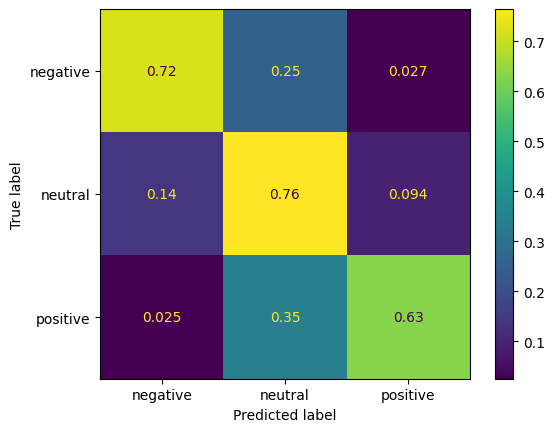

In [4]:
ConfusionMatrixDisplay.from_predictions(df["Sentiment"], df["Classification"],
                                        normalize="true");

The confusion matrix again, this time normalized with respect to predicted categories. This provides a different view on the model, and shows that "negative" predictions are the least trustworthy; a full 40\% of examples labeled "negative" by the model are actually neutral.

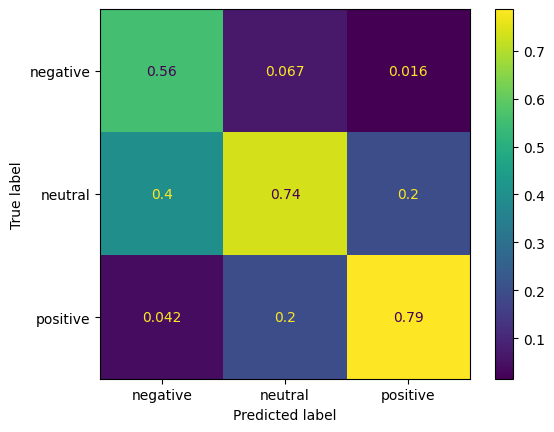

In [5]:
ConfusionMatrixDisplay.from_predictions(df["Sentiment"], df["Classification"],
                                        normalize="pred");